Implement the method of power iteration to approximate the top 10 PCs from HapMap3 data (see Galinsky et al. 2016a Am J Hum Genet). 


In cases of subtle structure (e.g. 2 populations with low Fst, or a single admixed population), investigate how accuracy of inferred ancestry varies with (a) number of SNPs used, (b) number of samples used, (c) whether or not other populations not relevant to the subtle structure are included in the data set. Discuss. 

*********
First part:
Include all ancestries?
Include all individuals? # does population size matter?
Include all 23 chromosomes?

#rare variants

How large is the data if we use all 23 chromosomes? Should we aim to use SNPs all 23 chromosomes for better accuracy?

(a) how do we assess the accuracy of inferred ancestry? How do we determine the inferred ancestry from PCs? clusters?
(c) other populations not relevant to the subtle structure <- does this mean a population that is very distant to the admixed population?


1. data pre-processing (data selection 1. standardize in some way? large/small population 2. which chromosome (based on number of SNPs) 3. how to handle rare/non-rare SNPs)
2. measures after method (accuracy?)
3. clarification on (c) distant to subtle structure. 


## This notebook includes analysis for all populations in HapMap3 project. It takes 40 individuals from each of the 11 populations.

In [3]:
import numpy as np
import pandas as pd
np.random.seed(42)


In [4]:
import sys
#update the path to include the hw_data directory
path = "/Users/tinaryu/stat_gen/hw_data"

sys.path.append(path) 
#sys.path is a list of directories that Python searches when you use import statement
#append then adds the hw_data to the directories to be searched
from CB_02704 import *

In [5]:
from PowerIteration_Functions import *

In [6]:
df = pd.read_csv('pop_info.csv')
df

,label,population sample,actual sample size
0,ASW,African ancestry in Southwest USA,49
1,CEU,Utah residents with Northern and Western Europ...,112
2,CHB,"Han Chinese in Beijing, China",84
3,CHD,"Chinese in Metropolitan Denver, Colorado",85
4,GIH,"Gujarati Indians in Houston, Texas",88
5,JPT,"Japanese in Tokyo, Japan",86
6,LWK,"Luhya in Webuye, Kenya",90
7,MEX,"Mexican ancestry in Los Angeles, California",50
8,MKK,"Maasai in Kinyawa, Kenya",143
9,TSI,Toscans in Italy,88


In [7]:
pop_labels = df['label'].tolist()
pop_labels[7] = 'MXL' #for some reason MEX is labeled as MXL in the csv file
pop_labels

['ASW', 'CEU', 'CHB', 'CHD', 'GIH', 'JPT', 'LWK', 'MXL', 'MKK', 'TSI', 'YRI']

In [8]:
#This may take a while (8ish minutes)
genos = []
for pop in pop_labels:
    print('reading', pop)
    genos.append(read_geno_pop(pop))


reading ASW
reading CEU
reading CHB
reading CHD
reading GIH
reading JPT
reading LWK
reading MXL
reading MKK
reading TSI
reading YRI


In [9]:
def GetCombinedGeno(genos, n): #n is the number of individuals to be included
    subsets = []
    # Slice the first n columns of each array
    for geno in genos:
        subsets.append(geno[:,:n])

    # Horizontally stack the sliced arrays
    combined = np.ma.hstack(subsets)
    return combined

In [10]:
comb = GetCombinedGeno(genos, 40)


In [11]:
def GetPCsWithVaryingSNPs(genos,n,m):
    if m > 699093:
        print('m is too large')
        return
    np.random.seed(42)
    combined = GetCombinedGeno(genos, n)
    combined = combined[:m]
    top10PCs = RunPowerIteration10PCs(combined)
    return top10PCs

In [21]:
import matplotlib.pyplot as plt
def PlotPCA(genos, pop_labels, n, m): #n is the number of individuals to be included #m is the number of SNPs to include
    top10PCs = GetPCsWithVaryingSNPs(genos,n,m)
    k = len(pop_labels)
    DistanceRatio = GetDistanceRatio(top10PCs,k, n)

    #PLOTTING
    # Define indices for each population
    indices = []
    for i in range(k):
        indices.append(range(i*n, (i+1)*n))

    # Assuming `k = 11` and `n` is the number of samples per population
    # Also assuming `pop_labels` contains the population names as a list of length 11
    # Generate 11 distinct colors
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, k))

    # Initialize a figure
    plt.figure(figsize=(8, 6))

    # Loop through each population
    for i in range(k):
        population_indices = range(i * n, (i + 1) * n)  # Indices for each population
        population_label = pop_labels[i]  # Label for the current population
        population_color = colors[i]  # Get the color for the current population

        # Plot the data for the current population
        plt.scatter(
            top10PCs[0][population_indices], 
            top10PCs[1][population_indices], 
            c=[population_color], 
            label=population_label, 
            s=20
        )

    # Add labels and title
    plt.title(f"all HapMap3 PCA - {m} SNPs")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
    plt.grid(True)
    plt.tight_layout()  # Adjust layout for readability
    plt.show()
    return DistanceRatio

SNP Count: 20000
Power iteration: converged at iter=22
Power iteration: converged at iter=1
Power iteration: converged at iter=97
Power iteration: converged at iter=41
Power iteration: converged at iter=1
Power iteration: converged at iter=72
Power iteration: converged at iter=108
Power iteration: converged at iter=164
Power iteration: converged at iter=605
Power iteration: converged at iter=2


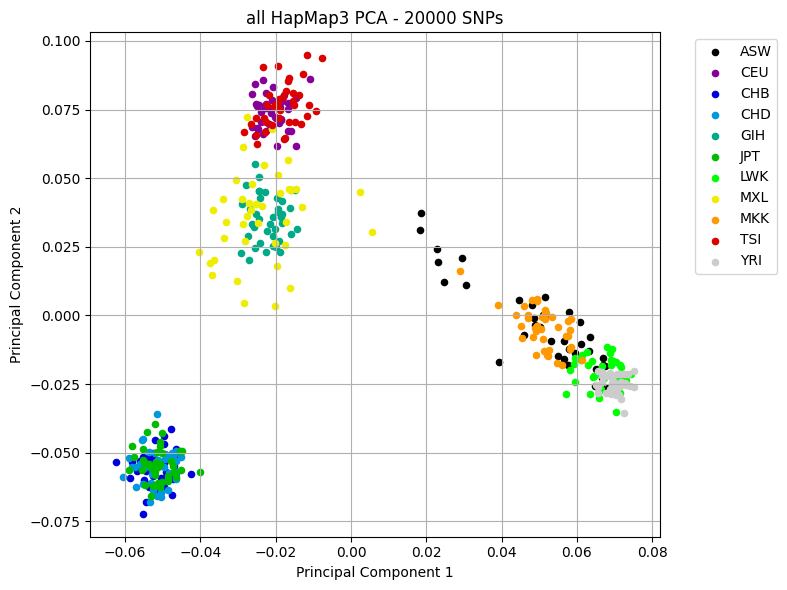

SNP Count: 200000
Power iteration: converged at iter=19
Power iteration: converged at iter=1
Power iteration: converged at iter=123
Power iteration: converged at iter=1
Power iteration: converged at iter=39
Power iteration: converged at iter=462
Power iteration: converged at iter=1
Power iteration: converged at iter=3963
Power iteration: converged at iter=1
Power iteration: converged at iter=278


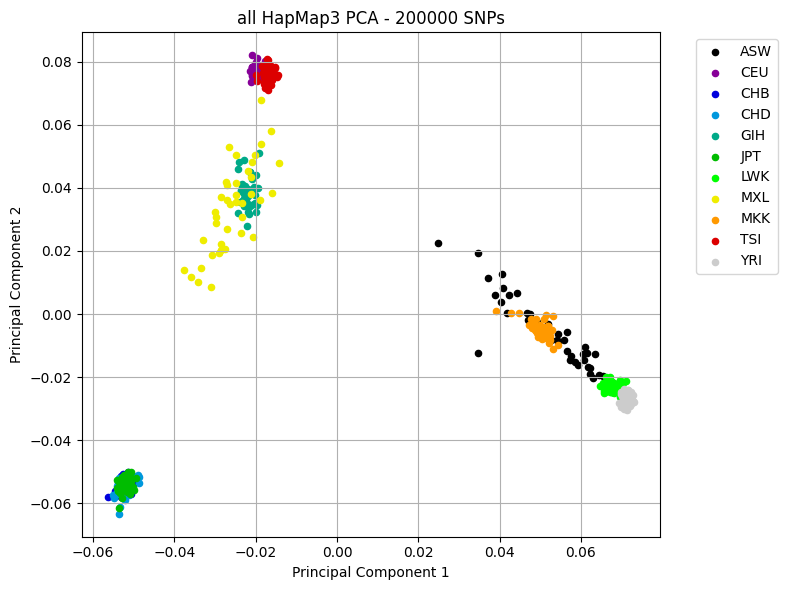

SNP Count: 699093
Power iteration: converged at iter=18
Power iteration: converged at iter=1
Power iteration: converged at iter=98
Power iteration: converged at iter=1
Power iteration: converged at iter=39
Power iteration: converged at iter=626
Power iteration: converged at iter=1
Power iteration: converged at iter=433
Power iteration: converged at iter=1155
Power iteration: converged at iter=1


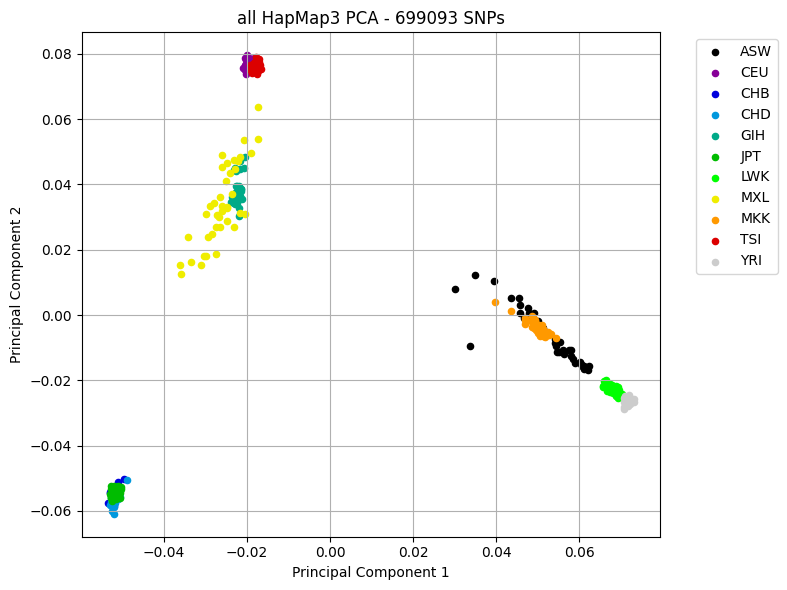

In [22]:
snp_counts = [20000,200000, 699093]
for snp_count in snp_counts:
    print(f"SNP Count: {snp_count}")
    PlotPCA(genos, pop_labels, 40, snp_count)

In [23]:
snp_counts = [10000, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 500000, 600000, 699093]
distances = {}

for snp_count in snp_counts:
    top10PCs = GetPCsWithVaryingSNPs(genos, 40, snp_count)
    distances[snp_count] = GetDistanceRatio(top10PCs, 11, 40)


Power iteration: converged at iter=19
Power iteration: converged at iter=1
Power iteration: converged at iter=530
Power iteration: converged at iter=1
Power iteration: converged at iter=490
Power iteration: converged at iter=1
Power iteration: converged at iter=293
Power iteration: converged at iter=1367
Power iteration: converged at iter=1
Power iteration: converged at iter=404
Power iteration: converged at iter=20
Power iteration: converged at iter=1
Power iteration: converged at iter=65
Power iteration: converged at iter=12
Power iteration: converged at iter=2
Power iteration: converged at iter=314
Power iteration: converged at iter=1
Power iteration: converged at iter=508
Power iteration: converged at iter=1057
Power iteration: converged at iter=1
Power iteration: converged at iter=21
Power iteration: converged at iter=1
Power iteration: converged at iter=120
Power iteration: converged at iter=1
Power iteration: converged at iter=39
Power iteration: converged at iter=213
Power iter

In [24]:
distancedf = pd.DataFrame(distances).T

In [25]:
distancedf.columns = pop_labels

In [26]:
distancedf['mean'] = distancedf.mean(axis=1)
distancedf

,ASW,CEU,CHB,CHD,GIH,JPT,LWK,MXL,MKK,TSI,YRI,mean
10000,4.104245,10.922982,11.627222,9.818265,7.477338,11.327804,13.742830,3.804825,9.480416,10.533745,16.242980,9.916605
50000,4.803303,25.816350,21.654208,23.111021,11.992613,24.437945,27.145807,4.898361,13.401796,20.219559,31.730392,19.019214
100000,5.692792,35.865046,31.964601,32.032993,13.417145,30.124945,33.666318,5.717559,18.181362,29.881040,45.180065,25.611260
150000,5.885708,45.003850,38.199956,35.488268,15.536999,35.914365,41.650407,6.090213,21.569066,40.397509,50.667152,30.582136
200000,6.179679,51.237673,46.070158,38.086692,17.413865,40.464647,51.884569,6.089867,25.101372,44.665786,54.863245,34.732505
250000,6.830886,56.142916,45.317288,42.043302,19.209480,44.838036,50.958599,5.994769,25.836776,52.322635,64.908819,37.673046
300000,6.762561,64.493679,41.725965,45.038382,19.492057,45.530335,58.328539,6.379786,25.388504,50.478111,69.860842,39.407160
350000,6.906979,65.347389,45.184308,46.587982,21.291489,53.689787,57.146812,6.647708,27.560253,56.952847,78.690938,42.364227
400000,7.030354,70.029268,52.670010,48.808375,21.999258,54.202319,61.138979,6.799198,28.475197,63.881056,82.888910,45.265720
500000,7.634839,76.289115,58.295865,56.436826,22.364288,66.071190,64.777950,6.671138,30.050858,65.358707,96.497192,50.040724


/var/folders/z7/2__sng712j3bvbdc64_2jnpr0000gn/T/ipykernel_68924/1325155818.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


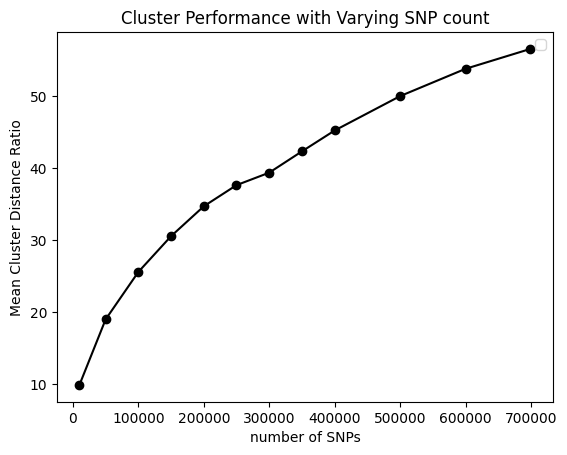

In [27]:
import matplotlib.pyplot as plt

# Example data
x = distancedf.index  # x-axis values
y = distancedf['mean']  # y-axis values

# Create the plot
plt.plot(x, y,  color='black', marker='o')

# Add labels and title
plt.xlabel('number of SNPs')  # Label for the x-axis
plt.ylabel('Mean Cluster Distance Ratio')  # Label for the y-axis
plt.title('Cluster Performance with Varying SNP count')  # Title of the graph

# Add a legend
plt.legend()

# Display the plot
plt.show()